# Executive Summary

Two analyses I've read of Dream's recent speedrunning performance have been flawed. I believe I can do better, and so I've done my own analysis. $\dots$

# Introduction

## Motivation

I first became aware of the situation via [a blog I follow](https://statmodeling.stat.columbia.edu/2020/12/24/dream-investigation-results-official-report-by-the-minecraft-speedrunning-team/). As someone who has watched some of Dream's video content and is casually addicted to Minecraft, I was drawn to read the Minecraft Speedrunning Team's [report](https://mcspeedrun.com/dream.pdf). It is very well written, in my opinion, and the team behind it has put a lot of time and effort into creating a thorough investigation. Nonetheless, it made several assumptions I do not think are warranted, assumptions that create fundamental problems with the analysis it presented.

That same blog post pointed me towards a [rebuttal report](https://drive.google.com/file/d/1yfLURFdDhMfrvI2cFMdYM8f_M_IRoAlM/view), which had been declared "[hilariously bad](https://statmodeling.stat.columbia.edu/2020/12/24/dream-investigation-results-official-report-by-the-minecraft-speedrunning-team/#comment-1622865)" and riddled with "[absurd errors](https://www.reddit.com/r/statistics/comments/kiqosv/d_accused_minecraft_speedrunner_who_was_caught/ggse2er/?utm_source=reddit&utm_medtook%20time%20to%20review%20theium=web2x&context=3)." My primary critiques of the MST's report were not present, surprisingly, which drew me to read the rebuttal. It also made some faulty assumptions, and again some of what I considered to be the most important ones were missed by the critiques. While not perfect by any means, it was better than I was led to believe.

I asked myself if I could create a better report. After some thought, I realized the analysis was quite similar to others I've done in the past, and so I started work on what you are currently reading.

## Declaration of Bias

I am a graduate student in computer science, specializing in computer graphics. I have not taken a university-level statistics course, though I have taken two courses on cryptography and information theory, and those subjects rely heavily on probability. Neither taught me anything new about probability; my interest in algorithms and philosophy have led me to casually study the statistics underlying science. I've found that self-study to be of immense use, as all my research has relied on statistical analysis at some level. At best, I can be considered an amateur statistician.

My plan to compensate for my lack of authority is to be more detailed and open. I will walk through all the math I employ, and explain my analysis and logic as I go. Not only is all the code I used available [via GitHub](https://github.com/hjhornbeck/bayes_speedrun_cheating/) under the [GNU Public License 3.0](https://github.com/hjhornbeck/bayes_speedrun_cheating/blob/main/LICENSE), it is present in this document as well. You can edit and replay both the simulations and analysis [via a web browser](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb), with the simple click of this button:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/hjhornbeck/bayes_speedrun_cheating/blob/main/did_dream_cheat.ipynb)

**I have not been paid by Dream to write this report, directly or indirectly. I have not been contacted by him or any third party, let alone asked to write this report.** I have enjoyed watching some of his videos, and I believe he is a very talented Minecraft player, but I am indifferent to whether or not his speed runs are considered valid.

**By the same token, I have no relationship with the Minecraft speedrunning community. None of them have contacted or paid me to write this report, directly or via a third party.** I have no plans on becoming a Minecraft speed runner, I'm content to merely build things and do some casual streaming.

My motivations for writing this report can be boiled down to two points:

1. [I hate p-values](https://www.google.com/search?q=p-values+site%3Afreethoughtblogs.com%2Freprobate).
2. [I enjoy working with conjugate priors](https://freethoughtblogs.com/reprobate/2020/02/19/dear-bob-carpenter/).

As you'll see, that gives me enough knowledge to critique both reports and generate my own analysis.

# A Critique of the Reports

## Minecraft Speedrunning Team

The [MST report](https://mcspeedrun.com/dream.pdf) is quite good. The authors go into extensive detail on the mechanics of how Blaze rod and Pigmen drops work, to the point of analyzing how random numbers are generated within Minecraft. They compare Dream's performance to other runners, which is vital to help rule out flaws in your analysis. If the analysis shows *all* of the top players are cheating, then either cheating is rampant or something is wrong with your analysis. The report goes into quite a bit of detail into the methods used, and shares code to help with reproducibility. I believe it is a good attempt to "present \[an\] unbiased, rigorous statistical analysis of the data" (pg. 4).

The biggest flaw with the report is the reliance on p-values to generate its conclusions. I have summarized [many critiques of that statistic elsewhere](https://freethoughtblogs.com/reprobate/2015/12/17/index-post-p-values/), but two points are worth covering here.

### P-values are Not What You Think

This is the definition of the p-value:

> If we assume the null hypothesis is true, and draw an infinite amount of data according to what that hypothesis predicts, how often is the test metric applied to that data calculated to be equal to or more extreme than the test metric calculated on the data we observed?

On its surface, it's a very strange metric. Why are we basing our decision on data we have not and will never observe? What counts as "extreme"? The core logic relies on both [modus tollens](https://mathworld.wolfram.com/ModusTollens.html)\footnote{If A is true, B is true; B is false; ergo A is false.} and [the central limit theorem](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html)\footnote{The means of sufficiently large samples taken from a larger population will follow a Gaussian distribution centred at the population mean.}, which are usually correct but not always so.\cite{cohen_earth_1994,vanderplas_frequentism_2014} 

P-values are not a probability of the null hypothesis being incorrect and cannot be treated as such, yet the MST report declares their final p-value to be an "upper bound on the chance" of Dream getting that lucky (pg. 22). The text which popularized the p-value encourages this mistake.

> When a number of quite independent tests of significance have been made, it sometimes happens that although few or none can be claimed individually as significant, yet the aggregate gives an impression that the probabilities are on the whole lower than would often have been obtained by chance. It is sometimes desired, taking account only of these
probabilities, and not of the detailed composition of the data from which they are derived, which may be of very different kinds, to obtain a single test of the significance of the aggregate, based on the product of the probabilities individually observed. (pg. 103)\cite{fisher1934statistical}

It is often not clear that Sir Ronald Fisher is talking about the odds of calculating a test statistic more extreme than data generated according to the null hypothesis, rather than the odds of the null hypothesis being true. Few people understand the p-value, and even experts can misinterpret it.

> In a recent survey of medical residents published in JAMA, 88% expressed fair to complete confidence in interpreting P values, yet only 62% of these could answer an elementary P-value interpretation question correctly. However, it is not just those statistics that testify to the difficulty in interpreting P values. In an exquisite irony, none of the answers offered for the P-value question was correct $\dots$ \cite{goodman_dirty_2008}

### P-values Exaggerate the Evidence

Multiple studies have looked into the predictive power of p-values by simulating experiments.\cite{hubbard_why_2008,colquhoun2014investigation,halsey_fickle_2015} These should be taken with a grain of salt, as many of them argue p-values exaggerate the evidence relative to Bayesian methods. If you believe hypotheses can only be true or false, and cannot be assigned probability values, then you believe Bayesian methods are invalid and thus cannot be used as a reference. Not all of these simulation studies use that reference, however.

> In this article, I investigate p-values in relation to replication. My conclusion is that, if you repeat an experiment, you are likely to obtain a p-value quite different from the p in your original experiment. The p-value is actually a very unreliable measure, and it varies dramatically over replications, even with large sample sizes. Therefore, any p-value gives only very vague information about what is likely to happen on replication, and any single p-value could easily have been quite different, simply because of sampling variability.\cite{doi:10.1111/j.1745-6924.2008.00079.x}

The evidence has become strong enough that some researchers have proposed lowering the traditional p-value cut-off of 0.05 to a lower value.\cite{Johnson19313} The theory is that rather than asking scientists to abandon the use of p-values, it is simpler to compensate by lowering the threshold for significance and thus increasing the amount of evidence required to reach that bar. Some fields of science have already made that transition, for instance particle physics and genomics research often require $p < 0.0000003$. If p-values exaggerate the evidence against the null hypothesis, and the null hypothesis is that Dream's drop rate was unmodified, then by using p-values the MST report is exaggerating the evidence against Dream. This alone makes another report worthwhile.

I have other complaints about the MST report, but there's significant overlap between them and what's in the Photoexitation report.

## Photoexcitation

The PE report offers a few good critiques. It argues that since Minecraft speedrunners almost always stop after they've earned $k$ items, instead of stopping after $n$ barters/drops, the resulting $k$ and $n$ do not follow the binomial distribution. The MST report does not consider this argument in the context of items picked up, though it does consider it in the context of when a speedrunner stops playing.

The PE report's decision to use Bayesian statistics was correct, as in my opinion it copes better with small sample sizes than frequentist methods such as the p-value. It also used simulations to examine the relevant mechanics of Minecraft, a wise choice that makes it easier to examine different possible outcomes in a controlled environment.

### Overuse of the Negative Binomial

That simulation within the PE report does show a blind spot. First, consider Blaze rods. In order to earn them in Minecraft, you must kill Blazes. While it is possible to kill multiple Blazes at once, the only way that's practical during a speedrun is to use the sweeping edge attack of a sword against one Blaze with multiple other near-death Blazes nearby. On top of the difficulty of acheiving that feat, most Minecraft speedrunners never craft a sword. Axes do more damage per strike than a sword, are practically a requirement to gather vital wood, and yet the lack the ability to attack multiple mobs. Nearly always, then, Minecraft runners kill one Blaze at a time, and thus can easily stop when they meet their quota.

A key part of a random seed any \% Minecraft 1.16 speedrun is earning Ender pearls via bartering with Piglins. Unlike Blaze rods, which drop instantly after a Blaze dies, Piglins only give the player an item six seconds after the player gave them a gold bar. This, combined with the low chance of earning Ender pearls via a barter, creates a major time barrier for any speedrunner. Fortunately for the player, they don't have to manually hand over every gold bar and can instead drop a stack of them at the feet of the Piglin.

Runners can speed up this process one of two ways. For their 14 minute 39 second speed run, Couriway bartered [with a half-dozen Piglins simultaneously](https://youtu.be/0auJTuzm_Xc?t=404) and waited until they got enough Ender pearls. By bartering with so many Piglins, though, they no longer had strict control over when to stop and thus we'd expect a barter stats of runners using this technique to be more Binomial than Negative Binomial.

Another approach is to multitask. For their 15 minutes 51 second speedrun, Dowsky trapped a Piglin in a pit, tossed gold bars into it, and while the Piglin was bartering [ran off to kill Blazes](https://youtu.be/0auJTuzm_Xc?t=404). If the Blaze spawner is far enough away, the player won't be able to see when Ender pearls drop and thus won't be able to stop bartering once their quota is met. In this case the barters would be better modelled by a Binomial than a Negative Binomial.

The simulation code present on page 17 of the PE report, though, only models bartering with a single Piglin that the player can monitor closely. That would be perfectly fine if they could show Dream used that technique exclusively when bartering with Piglins, but the report makes no such effort.

### Misunderstanding Minecraft

The PE report demonstrates other misunderstandings about how Minecraft is played.

> If you consider every Minecraft player, then a ”perfect” ender pearl and blaze drop record (2/2 ender pearl barters and 7/7 blaze rod drops) occurs multiple times per hour, since this has a 1 in 60000 odds and Minecraft is played many millions of times a day. Considering all Minecraft worlds ever played and the multitude of ways in which luck plays a role, even one in a trillion events happen daily.

I am a Minecraft player. While I haven't tracked my Ender pearl barter stats, I can state with confidence that of the zero attempts I'm made to earn Blaze rods, zero have been successful. This is because I have no interest in reaching "The End" at the moment, nor have I had the inclination in the six months or so I've been playing this game. If that did change, I'm playing on a private server with other people who have long since tracked down a stronghold on our shared map and set up a minecart route to it. In practice, gathering the materials to make an Eye of Ender is something most Minecraft players rarely do, and when they attempt it is only rarely done more than once the entire time they play Minecraft. Only a very small fraction of the Minecraft community attempts to speedrun the game, and only those players routinely hunt for Ender pearls and Blaze rods. One in a trillion events can happen daily, but only if about a trillion attempts are made at those events per day.

This lack of knowledge is understandable, given the author does not appear to be a Minecraft player. Nonetheless, the more you know about a topic the more likely any analysis of that topic will rest on false premises.

### Lack of a Comparison to Real World Data

This premise leads the PE report to forgo comparisons to other speedrunners.

> Comparison to other runners is not necessary to establish that Dream had very low probability runs. Instead this comparison is more relevant to the interpretation of these low probabilities. For example, it reduces the plausibility that the low probabilities were due to some universal glitch that affects all speedrunners. As the reader is assessing the evidence, the low probability of Dream’s runs and that Dream performed much better than other speedrunners should not be considered as independent pieces of evidence as they both are consequences of the same thing. Any lucky speedrunner chosen because they look lucky will look lucky when compared to other speedrunner
streams that were chosen randomly.

At the core of statistics is the idea of [a reference class](https://en.wikipedia.org/wiki/Reference_class_problem). By invoking every Minecraft player, the PE report is stating that Dream's performance should be compared to them, or in other words that they are the appropriate class of entities to use as a reference. Here, though, the report argues that Dream's performance should not be compared to that of other top speed runners, because it is too dissimilar and therefore makes a poor reference class.

Setting aside the argument that this is the reverse of reality, it is notable that the report makes no attempt to compare Dream's performance to any real-world reference class. If a perfect Blaze rod and Ender pearl bartering session is indeed a common occurance, it should be easy to demonstrate that by pointing to a few examples of ordinary Minecraft players acheiving those feats. Even if they are rarely recorded, discussion of such events must appear in comment sections or Discord channel messages, and we would expect it to be common knowledge among players of Minecraft.

Conversely, even if other speedrunners are an inappropriate reference class, running their performance through the report's simulation would be a valuable check that it is working properly. This is why scientific studies usually have control groups, as they are a validation of the methodology. The author of this report had the data to do this, thanks to the MST report, and passing it through their simulation was as easy as editing two lines of code, so there was no lack of means or opportunity.

### Missing Context

> In this document, I don’t have time to discuss the long-term debate between these different statistical
paradigms and when they should be applied. The short version is that another way of investigating whether
the probabilities were modified is to try to determine what probabilities were used. (pg. 5)

By skipping the details, the PE report leaves out an important consequence of using Bayesian statistics. You can simplify Bayesian stats down to

> Given the data before me, what credence do I place on a hypothesis relative to some reference?

"Credence" can be thought of in terms of "belief points:" when I say I give 100:1 odds that Joe Biden will become President of the United States, I am saying that for every one belief point I give to the hypothesis "Joe Biden will not become President" I also give one hundred towards "Joe Biden will become president."\footnote{The comparison to betting odds is no accident, the study of statistics began with people trying to figure out either how to cheat at gambling or how to detect said cheating.\cite{doi:https://doi.org/10.1002/0471667196.ess0845.pub3}}

Mathematically, "credence" is the output of a [likelihood function](https://en.wikipedia.org/wiki/Likelihood_function). Likelihoods obey all the same rules as probabilities, save one: while probabilities are bounded to stay between 0 and 1, likelihoods only have a lower bound of zero. The inputs to a likelihood function are the data we observe, as well as parameters used to describe a model of our belief in that data. These parameters form a multi-dimensional parameter space. All hypotheses we can make about the data live within that space. These may be point hypotheses ("Dream's Blaze rod drop rate was precisely 0.509583957"), or composite hypotheses that are a weighted subset of all possible point hypotheses ("Dream's Blaze rod drop rate ranged between 0.45 and 0.55"). If the parameter space is discrete ("which side of a six-sided die will appear"), that weighted subset is calculated by summation over all possible parameters; if it is continuous ("Dream's Blaze rod drop rate"), it is calculated by integration over all parameters.

Unfortunately, calculating those integrals directly is impractical for all but the easiest problems. Frustrated statisticians and mathematicians began looking for shortcuts and alternatives, and a number of them were codified into what we now call frequentist statistics. The p-value is one such example: it also relies on likelihood functions, but it assumes the amount of data collected is practically infinite. This allows the problem to be transformed via the central limit theorem into another that's much easier to integrate.

This has an important side-effect: the flip-side of p-values exaggerating the evidence is that Bayesian metrics are relatively conservative when given the same evidence. if the default hypothesis is some variation of "did Dream play fair?", then Bayesian statistics will be slower to give up on that than frequentist statistics. To put that in bold:

**Bayesian statistics is intrinsically more likely to conclude Dream played fairly, relative to frequentist statistics, given the same evidence.** Whether this is a problem or not depends on how sound you think the premises are behind each system. It's not unfair to invoke p-values if the "fairer" analysis is Bayesian and you reject that system outright. By the same token, a Bayesian analysis of Dream's performance is not biased towards him relative to one that uses p-values, provided you think p-values should not be applied to this problem.

### Biased Priors

You can think of a prior as a likelihood function supplied with zero evidence. It is convenient to define your likelihood function as how your credence changes given one atom of data, because then you can chain together arbitrary numbers of likelihood functions to handle arbitrary amounts of evidence. That chain has to be anchored somewhere, though, so you also need to define the likelihood of a specific choice of parameters absent any evidence. The opposite end of that chain is the posterior, or your credence after accounting for all the evidence.

Some priors are hypothesis-specific. "What are the odds that Dream cheated?" depends on "what are the odds of a speedrunner cheating?". If cheating is common in the speedrunning community, then the odds of a specific speedrunner cheating are high, absent any evidence that could change the odds of Dream cheating. Likewise, the odds of a specific speedrunner cheating are low if speedrunners in general rarely cheat, again absent any evidence leading us to one conclusion or another.

Some priors apply to all hypotheses. Regardless of whether or not Dream was cheating, what are the odds of him earning 423 Ender pearls after 423 barters? It must be lower than the odds of him having 20 pearls after 423 barters. The odds of earning 40 Ender pearls, or any number between 20 and 423, must be somewhere between those two reference points.

> For those savvy in Bayesian statistics, I use a flat/uniform/tophat prior on the probability boost from
1 to 5 and confirmed that these limits do not significantly affect the interpretation. In this case, this just
means calculating the likelihoods on a grid from 1 to 5 and, since the prior is flat, these are equivalent to the
relative posterior probabilities. This prior does not include any corrections for biases or any opinion that
Dream modified his probabilities. (pg 10)

The prior used in the PE report gives as much credence to Dream earning 20 pearls after 423 barter as it does him earning 100. This is going to exaggerate the likelihood that Dream cheated in the resulting analysis.

The Minecraft Speedrunning Team has [responded to the PE report](https://mcspeedrun.com/dream/rebuttal.pdf). The best critique it makes mirrors one of mine.

> Moreover, their estimation of 300 livestreamed runs per day over the past year is highly implausible. Many runs are not livestreamed, and the estimation is based on current numbers, even though Minecraft speedrunning has grown massively in the recent months. 

> At the time of Dream’s run, there were 487 runners who had times in 1.16 - far under 1000 - and the vast majority of these were unpopular or did not stream. Selection bias could only be induced from observed runners, so speedrunners who had no significant viewership watching their attempts should not be included. (pg. 3)

The remaining critiques do not apply to the critiques I have of the PE report, and do not need to be discussed here.

# Methodology

Given the flaws in both reports' methodology, it is fair to ask what a better one looks like. Some of what follows repeats what is in another report, but it is critical enough to be worth inclusion anyway.

## The Binomial and Negative Binomial Distributions

As the MST report shows, when a Blaze is killed it can either drop one Blaze rod, or drop zero, and both outcomes are equally likely to happen. The number dropped can increase if the player has enchantments on their weapon, but that almost never happens during a speed run. Blaze rod drops behave like a Bernoulli process:

1. Some algorithm or thing will "emit" one of two possible outputs, canonically labelled 0 and 1.
2. Which of the two outputs is generated cannot be predicted beforehand.
3. The current output does not depend on what's been generated before or will be generated later.
4. As the number of values emitted becomes arbitrarily large, the ratio of zeros to ones comes arbitrarily close to a fixed value. That value does not change if we discard an arbitrary number of those outputs.

We can easily simulate that behaviour ourselves. Suppose I decided to collect some Blaze rods for the first time, and set out to kill six Blazes. To get an idea of how many rods I'd earn, I repeat the process five times.

In [1]:
# Uncomment this line to install all dependencies locally
# !pip install --user ipypublish mpmath numpy pandas matplotlib scipy

from fractions import Fraction

from ipypublish.scripts import nb_setup

from math import comb,log,factorial
import matplotlib.pyplot as plt
from mpmath import mp
import numpy as np

pd = nb_setup.setup_pandas(escape_latex=False) # allow LaTeX in Panda's cells
from scipy.stats import beta,binom,nbinom

dpi = 200    # change this to increase/decrease the resolution charts are made at

In [2]:
# allow for perfect replication by fixing the seed
random  = np.random.default_rng(8)

n = 6     # number of Blazes killed
c = 5     # number of runs to kill n Blazes

for experiment in range(c):
    results = random.choice( 2, size=n )
    [print("[Blaze rod] ", end='') if x==1 else print("[ nothing ] ", end='') for x in results]
    print( f"   total = {sum(results)}/{n}" )

[Blaze rod] [ nothing ] [ nothing ] [Blaze rod] [ nothing ] [ nothing ]    total = 2/6
[Blaze rod] [Blaze rod] [Blaze rod] [Blaze rod] [ nothing ] [ nothing ]    total = 4/6
[Blaze rod] [ nothing ] [ nothing ] [ nothing ] [ nothing ] [ nothing ]    total = 1/6
[Blaze rod] [ nothing ] [Blaze rod] [ nothing ] [Blaze rod] [ nothing ]    total = 3/6
[ nothing ] [ nothing ] [ nothing ] [ nothing ] [Blaze rod] [Blaze rod]    total = 2/6


Naively, I might calculate my odds of getting exactly three rods by multiplying the odds of getting a rod (50\%) by itself three times, then multiply that by the odds of not getting a rod (50\%) three times. If I carry on that logic for all other possible outcomes and total them up, however, I find the total probability of all outcomes is $7 \cdot (\frac 1 2)^6 = \frac{7}{64}.$ That is not a valid probability distribution over $k$, because it fails to sum to one.

The error in that logic is that I've failed to account for the number of identical outcomes. Two of the five runs shown above have two successes, but both are arranged in a different way. Had one of my runs gotten a Blaze rod from every Blaze, though, there would be only one way to arrange each success. To correctly calculate the probability of $k$ drops when killing $n$ Blazes, I would need a formula like

$$ (\text{Number of ways to earn k Blaze rods}) \cdot (\text{Odds of getting k Blaze rods, ignoring order}) $$

That formula defines what is known as the Binomial distribution.

\begin{equation}
\text{Binom}(n, k, p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}, \label{eqn:binomial}
\end{equation}

where $n$ is the number of times the Bernoulli process is sampled, $k$ is the number of 1's emitted, $p$ is the probability of that Bernoulli process emitting a 1, and "!" is the factorial function. For my toy example above, we find the odds for $n = 6$, $k = 3$, and $p = \frac 1 2$ are not $\frac 7 {64}$ but instead $\frac 5 {16}$. If we were to carry that on for all seven possible values of $k$ and sum the probabilities, they would indeed add up to one.

In [3]:
def binomial( n, k, p ):
    return Fraction(factorial(n), factorial(k)*factorial(n-k)) * (p**k) * ((1-p)**(n-k))

n = 6
p = Fraction(1,2)

total = sum( binomial(n, k, p) for k in range(n+1) )
print( f'The sum of probabilities of all possible k is {total}', end='' )
if total == Fraction(1,1):
    print( ', which means Binom(n,k,p) defines a probability distribution over k.')
else:
    print( '.' )

The sum of probabilities of all possible k is 1, which means Binom(n,k,p) defines a probability distribution over k.


Suppose I make one tweak to the above scenario, though. I would now like to earn three Blaze rods, to allow me to craft the six Ender pearls I have in my inventory into six Eyes of Ender. The number of Blazes I have to kill is now irrelevant.

In [4]:
random  = np.random.default_rng(15)

k = 3     # number of Blaze rods needed
c = 5     # number of runs to earn k Blaze rods

for experiment in range(c):
    results = random.choice( 2, size=16 )
    while np.sum(results) < k:
        results = np.append( results, random.choice( 2, size=16 ) )
    n = np.sum( np.cumsum( results ) < k ) + 1
    [print("[Blaze rod] ", end='') if x==1 else print("[ nothing ] ", end='') for x in results[:n]]
    print( f"   total = {k}/{n}" )

[Blaze rod] [Blaze rod] [Blaze rod]    total = 3/3
[Blaze rod] [ nothing ] [ nothing ] [Blaze rod] [ nothing ] [Blaze rod]    total = 3/6
[ nothing ] [ nothing ] [ nothing ] [ nothing ] [ nothing ] [Blaze rod] [Blaze rod] [Blaze rod]    total = 3/8
[ nothing ] [Blaze rod] [Blaze rod] [Blaze rod]    total = 3/4
[Blaze rod] [ nothing ] [ nothing ] [ nothing ] [Blaze rod] [ nothing ] [Blaze rod]    total = 3/7


Whereas before my last kill of each run may have given me a Blaze rod or may not, now all of my final kills earn me a Blaze rod. The number of possible combinations has changed from the Binomial case. Let's replay the same sequence of events, only this time we disregard the final kill that earned the final Blaze rod.

In [5]:
random  = np.random.default_rng(15)

k = 3     # number of Blaze rods needed
c = 5     # number of runs to earn k Blaze rods

for experiment in range(c):
    results = random.choice( 2, size=16 )
    while np.sum(results) < k:
        results = np.append( results, random.choice( 2, size=16 ) )
    length = np.sum( np.cumsum( results ) < k )       # note the missing subtraction
    [print("[Blaze rod] ", end='') if x==1 else print("[ nothing ] ", end='') for x in results[:length]]
    print( f"   total = {sum(results[:length])}/{length}" )

[Blaze rod] [Blaze rod]    total = 2/2
[Blaze rod] [ nothing ] [ nothing ] [Blaze rod] [ nothing ]    total = 2/5
[ nothing ] [ nothing ] [ nothing ] [ nothing ] [ nothing ] [Blaze rod] [Blaze rod]    total = 2/7
[ nothing ] [Blaze rod] [Blaze rod]    total = 2/3
[Blaze rod] [ nothing ] [ nothing ] [ nothing ] [Blaze rod] [ nothing ]    total = 2/6


Our "last" kill is no longer guaranteed to earn a Blaze rod. You'd likely guess these clipped sequences follow the Binomial distribution, and in this case your intuition is correct. By definition, each event emitted by the Bernoulli distribution is independent of all others, so as of the $(n-1)$-th event we'd have no indication the $n$-th event would earn us our $k$-th Blaze rod and we'd stop the sequence.

You can see that relation from the formula for the Negative Binomial distribution, which applies when $k$ is our stopping metric and not $n$.

\begin{equation}
\text{NegBinom}(n,k,p) = {n-1 \choose k-1} p^k (1-p)^{n-k} = p \cdot \text{Binom}(n-1,k-1,p) \label{eqn:negbinom}
\end{equation}

## Conjugate Priors

Remember when I mentioned during the introduction that calculating the integrals necessary for Bayesian statistics "is impractical for all but the easiest problems?" Here's one exception: suppose we wish to calculate our credence for the average of a random variable that's distributed according to the [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution). The likelihood function in this case is also a Gaussian distribution. If our prior credence for the average also follows a Gaussian distribution, then our posterior is also a Gaussian distribution. Even better, we can treat the posterior as if it was a prior, apply another Gaussian as a likelihood function to represent new data, and get back another Gaussian posterior that incorporates both the old and new data. Best of all, the mean and standard deviation of the Gaussian posterior don't require a sophisticated computer to compute, a calculator or ever a piece of paper is usually enough.

When the prior and posterior of a model follow the same distribution, after applying a consistent likelihood function, that prior is called a [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior). These are oases of easy calculation in what is otherwise a Bayesian wasteland of tangled computations. If we can find one applicable here, our analysis will be immensely simpler. The Gaussian example I used above is tempting, as the Gaussian distribution is often used as an approximation of the Binomial, but approximations aren't good enough for what we're aiming for.

Fortunately, the Binomial distribution not only has a conjugate prior, [the Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution), but the updating rule doesn't require a fixed $k$ or $n$. This saves us from having to apply corrections for speedrunners that choose different Blaze rod quotas or happen to pick up Ender pearls outside of bartering. We will need to do some math to convert it to handle the Negative Binomial scenario, however. The updating rule for the Beta conjugate prior is

\begin{align}
\text{Binom}(n,k,p) \cdot \text{Beta}(\alpha_\text{prior}, \beta_\text{prior}, p) &\to \text{Beta}(\alpha_\text{prior} + k, \beta_\text{prior} + n - k, p) \label{eqn:beta_update} \\
\text{Beta}(\alpha, \beta, p) &= \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} p^{\alpha - 1} (1-p)^{\beta - 1} \label{eqn:beta}
\end{align}

where $\Gamma(x)$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function). It is an extrapolation of factorials, such that $n! = \Gamma(n+1)$ for any positive integer $n$. Unlike factorials, though, the Gamma function can be applied to fractions, real numbers, and even complex numbers.

Our next challenge is settling on a prior. There are two in particular that see heavy use, the Bayes/Laplace prior ($\alpha = \beta = 1$) and the Jeffreys prior ($\alpha = \beta = \frac 1 2$). The PE report uses the Bayes/Laplace prior, and given my critique I do not think it is appropriate here. The same reasoning applies to the Jeffreys prior; it groups the credence around $p = 0$ and $p = 1$, both of which are unlikely outcomes whether or not you think cheating was involved.

The prior I recommend instead places the bulk of the credence around the expected drop rate for each item, and spreads the remainder out according to a scaling factor.

In [6]:
def prior(r, scale):
    """Generate an appropriate prior to be used during inference with a Beta conjugate prior.
    
    Parameters
    ----------
    r = The expected rate of item drops, assuming no modification of the game. Must be between 0 and 1.
    scale = A value to scale our credence around r. Higher values favour the hypothesis that
       someone played fairly, while lower values favour someone who cheated. Must be a positive real."""
    
    # ensure the proper values are given
    assert (r > 0) and (r < 1)
    assert scale > 0
    
    if r < .5:
        return (scale, scale*(1-r)/r)
    else:
        return (scale*(1-r)/r, scale)

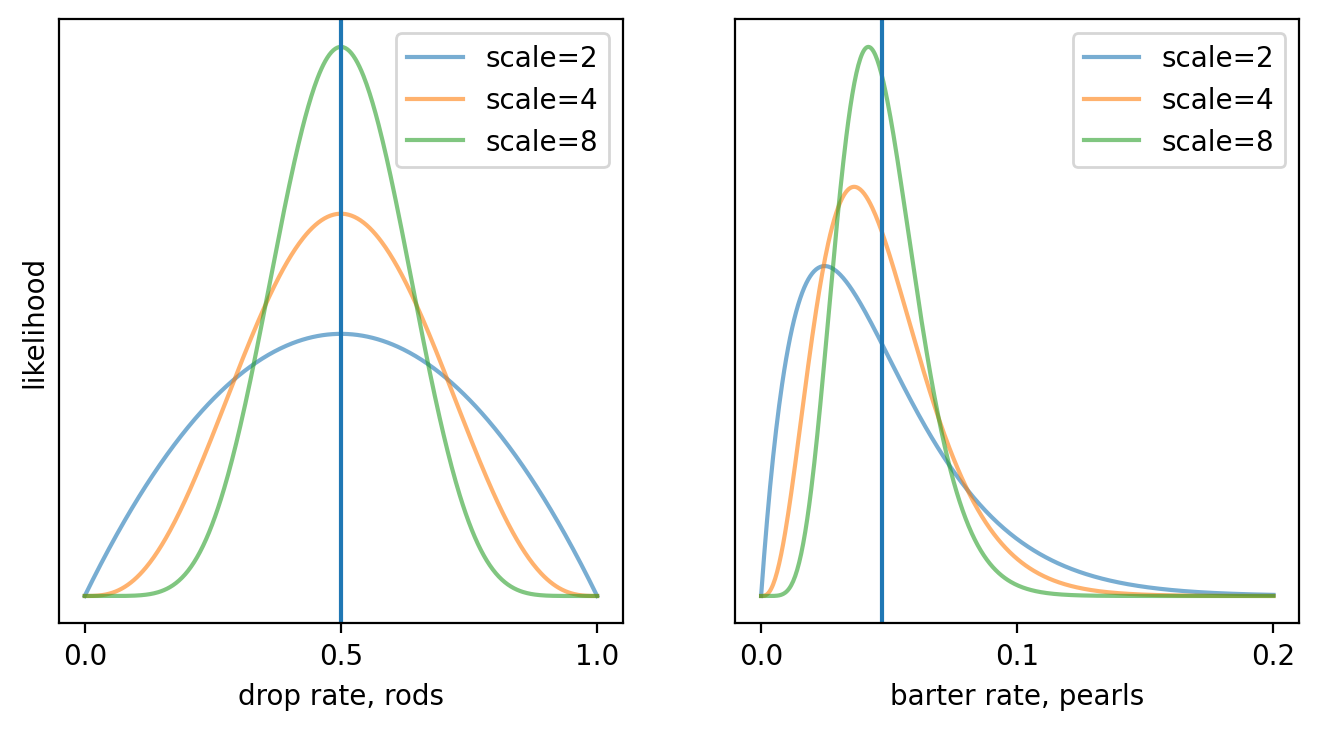

In [25]:
fig = plt.figure(figsize=(8, 4), dpi=dpi, facecolor='w', edgecolor='k')
(ax1, ax2) = fig.subplots(1, 2)

x = np.linspace(0,1,512)

scales = [2,4,8]
labels = [f'scale={scale}' for scale in scales]
r_blaze = Fraction(1,2)
r_pearl = Fraction(20,423)

for i,scale in enumerate(scales):

    blaze_prior = [float(x) for x in prior( r_blaze, scale )]
    ax1.plot(x, beta.pdf(x, *blaze_prior), '-', alpha=0.6, label=labels[i] )
    
    pearl_prior = [float(x) for x in prior( r_pearl, scale )]
    ax2.plot(x/5, beta.pdf(x/5, *pearl_prior), '-', alpha=0.6, label=labels[i] )
    

ax1.legend()
ax1.set_xticks([0,.5,1])
ax1.set_xlabel('drop rate, rods')
ax1.set_yticks([])
ax1.set_ylabel('likelihood')
ax1.axvline( r_blaze )

ax2.legend()
ax2.set_xticks([0,.1,.2])
ax2.set_xlabel('barter rate, pearls')
ax2.set_yticks([])
ax2.axvline( r_pearl )

plt.show()

The priors presented in Figure \ref{fig:sub_priors} are all quite subjective, and ask you to make a judgement call on the appropriate scale value to use. I think 4 is a good compromise, but it's simple enough to keep $\alpha_\text{prior}$ and $\beta_\text{prior}$ as free parameters. If you disagree with my choice of Beta prior, you are free to substitute any other. I'll also do a sensitivity analysis where I vary the prior strength with real-world data to help judge how strongly the conclusion is determined by the prior.

The apparent skew on the Ender pearl prior is because we are fixing the mean instead of the maximal likelihood. As we'll be integrating across this prior, fixing the latter would bias us to assume the barter rate is higher.

## The Posterior Distribution for the Binomial and Negative Binomial 

We can now construct a posterior distribution for both the Binomial and Negative Binomial cases. 

The updating rule of Equation \ref{eqn:beta_update} only works for one run of $k$ successes via $n$ trials, distributed according to the Binomial, but it is simple enough to extend for multiple runs. Define $\vec n = \{n_1, n_2, \dots, n_c\}$ as a vector that contains the trial counts for all $c$ runs, and $\vec k = \{v_1, v_2, \dots, v_c\}$ as a vector for each success count. The resulting Beta posterior is

\begin{equation}
\text{Beta}( \alpha_\text{prior} + \sum_{j=1}^c k_j, \beta_\text{prior} + \sum_{j=1}^c (n_j - k_j), p ) = \frac{\Gamma\left(\alpha_\text{prior} + (\sum_{j=1}^c k_j) + \beta_\text{prior} + (\sum_{j=1}^c (n_j - k_j))\right)}{\Gamma(\alpha_\text{prior} + \sum_{j=1}^c k_j)\Gamma(\beta_\text{prior} + \sum_{j=1}^c (n_j - k_j))} p^{\alpha_\text{prior} - 1 + \sum_{j=1}^c k_j} (1-p)^{\beta_\text{prior} - 1 + \sum_{j=1}^c (n_j - k_j)} \label{eqn:beta_binom_mess}
\end{equation}

Equation \ref{eqn:beta_binom_mess} is a bit ugly to look at. One way to clean it up is to use different notation. The [Taxicab norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Taxicab_norm_or_Manhattan_norm) is defined as

\begin{equation}
\|\vec n\|_1 = \sum_{j=1}^c |n_j|,
\end{equation}

and since no value contained by $\vec n$ or $\vec k$ are negative this substitution won't screw up the math. Note as well that

\begin{equation}
\sum_{j=1}^c (n_j - k_j) = \left(\sum_{j=1}^c n_j\right) - \left(\sum_{j=1}^c k_j\right) = \|\vec n\|_1 - \|\vec k\|_1,
\end{equation}

which, along with $\|\vec k\|_1 + \|\vec n\|_1 - \|\vec k\|_1 = \|\vec n\|_1$, allows us to rewrite Equation \ref{eqn:beta_binom_mess} as

\begin{equation}
\text{Beta}( \alpha_\text{prior} + \|\vec k\|_1, \beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1, p ) = \frac{\Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|\vec n\|_1)}{\Gamma(\alpha_\text{prior} + \|\vec k\|_1)\Gamma(\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1))} p^{\alpha_\text{prior} + \|\vec k\|_1 - 1} (1-p)^{\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1 - 1)} \label{eqn:beta_binom_post}
\end{equation}

There's no need to normalize Equation \ref{eqn:beta_binom_post} to make it a probability distribution over $p$, as

\begin{equation}
\int_{p=0}^1 \text{Beta}(\alpha, \beta, p) = 1 \label{eqn:beta_integral}
\end{equation}

and therefore it is already normalized. That handles the case when $\vec k$ and $\vec n$ are taken from a Binomial distribution. What about the Negative Binomial case? Equation \ref{eqn:negbinom} shows the Negative Binomial is simply the Binomial times the probability of success, so in theory some math would give us a solution specifically tailored to the Negative Binomial. Unfortunately, that equation also shows the Negative Binomial isn't a probability distribution with respect to $p$.

In [8]:
n = 6
k = 3

# mp.quad() uses quadrature to numerically integrate. No math necessary on our side!
result = mp.quad( lambda p: p*binomial(n, k, p), (0,1) )

print( f'The integral of all possible p is {result}', end='' )
if result == Fraction(1,1):
    print( ', which means p*Binom(n,k,p) defines a probability distribution over p.')
else:
    print( '.' )

The integral of all possible p is 0.0714285714285714.


It is actually a probability distribution with respect to $n$. We must normalize it to create a true posterior, and the best time to do so is after extending the updating rule. First, observe that

\begin{align}
\sum_{j=1}^c (n_j - 1) &= \left(\sum_{j=1}^c n_j\right) - c = \|\vec n\|_1 - c \\
(\|\vec n\|_1 - c) - (\|\vec k\|_1 - c) &= \|\vec n\|_1 - \|\vec k\|_1,
\end{align}

and secondly, observe that we can rearrange the order we multiply without changing the final product. This allows us to write

\begin{align}
\text{posterior}_\text{Negative Binomial} &= p^c \left( \left( \prod_{j=1}^c \text{Binom}(n_j - 1, k_j - 1, p) \right)  \text{Beta}(\alpha_\text{prior}, \beta_\text{prior}, p) \right) \\
{} &= p^c \text{Beta}( \alpha_\text{prior} + \|\vec k\|_1 - c, \beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1, p ) \\
{} &= p^c \frac{\Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|\vec n\|_1 - c)}{\Gamma(\alpha_\text{prior} + \|\vec k\|_1 - c)\Gamma(\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1)}p^{\alpha_\text{prior} + \|\vec k\|_1 - c - 1}(1-p)^{\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1 - 1}
\end{align}

We can tidy that up a bit, as $p^a \cdot p^b = p^{a + b}$ and $c - c = 0$.

\begin{equation}
{} = \frac{\Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|\vec n\|_1 - c)}{\Gamma(\alpha_\text{prior} + \|\vec k\|_1 - c)\Gamma(\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1)}p^{\alpha_\text{prior} + \|\vec k\|_1 - 1}(1-p)^{\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1 - 1} \label{eqn:negbinom_unnormed}
\end{equation}

To normalize Equation \ref{eqn:negbinom_unnormed} according to $p$, we only need to divide it by integrating across $p$.

\begin{equation}
\int_{p=0}^1 \frac{\Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|\vec n\|_1 - c)}{\Gamma(\alpha_\text{prior} + \|\vec k\|_1 - c)\Gamma(\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1)}p^{\alpha_\text{prior} + \|\vec k\|_1 - 1}(1-p)^{\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1 - 1}
\end{equation}

Note that all the Gamma functions are unaffected by any change in $p$. As $\int_x c \cdot g(x) = c \int_x g(x)$, we can pull them out of the integral. Since the same value is present in the numerator, all the Gamma functions cancel and we are left with

\begin{equation}
\int_{p=0}^1 p^{\alpha_\text{prior} + \|\vec k\|_1 - 1}(1-p)^{\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1 - 1}
\end{equation}

to evaluate. While this may seem daunting, remember that the Beta distribution integrates to 1 across $p$. Thus we can exploit the prior trick to rearrange Equation \ref{eqn:beta_integral}, and find

\begin{align}
\int_{p=0}^1 \text{Beta}(\alpha, \beta, p) &= 1 \\
\int_{p=0}^1 \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} p^{\alpha-1}(1-p)^{\beta-1} &= 1 \\
\int_{p=0}^1 p^{\alpha-1}(1-p)^{\beta-1} &= \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} \label{eqn:beta_trick}
\end{align}

Equation \ref{eqn:beta_trick} will be incredibly handy in future, but for now it allows us to finish normalizing Equation \ref{eqn:negbinom_unnormed}.

\begin{align}
\alpha - 1 &= \alpha_\text{prior} + \|\vec k\|_1 - 1 \\
\alpha &= \alpha_\text{prior} + \|\vec k\|_1 \\
\beta &= \beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1 \\
\text{posterior}_\text{Negative Binomial} &= \frac{p^{\alpha_\text{prior} + \|\vec k\|_1 - 1}(1-p)^{\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1 - 1}}{\frac{\Gamma(\alpha_\text{prior} + \|\vec k\|_1 )\Gamma(\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1)}{\Gamma(\alpha_\text{prior} + \beta_\text{prior} \|\vec n\|_1)} } \\
{} &= \frac{\Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|\vec n\|_1)}{\Gamma(\alpha_\text{prior} + \|\vec k\|_1)\Gamma(\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1)} p^{\alpha_\text{prior} + \|\vec k\|_1 - 1} (1-p)^{\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1 - 1} \label{eqn:beta_negbinom_post}
\end{align}

This is identical to Equation \ref{eqn:beta_binom_post}.\footnote{This is also why I didn't bother showing the derivation of the Beta update rule: calculating $\text{Binom}(n,k,p) \cdot \text{Beta}(\alpha, \beta, p)$ is trivially harder than $p \cdot Beta(\alpha, \beta, p)$, and the renormalization process is exactly the same. The extension from $k$ and $n$ to $\vec k$ and $\vec n$ is also trivial.} The PE report was correct to raise the possibility that barters and drops do not follow the Binomial distribution (pg. 7), but an analyis that used the Negative Binomial instead would come to the same conclusion. The MST report is also incorrect when they state that the Binomial distribution is "a very good approximation" (pg. 10) for barters/drops, in reality it leads to the exact same outcome as assuming the Negative Binomial instead.

The posterior from Equation \ref{eqn:beta_negbinom_post} is worth seeing in action. We'll apply it to the toy example from Listing \ref{code:negbinom_exam}, using the prior I defined earlier.

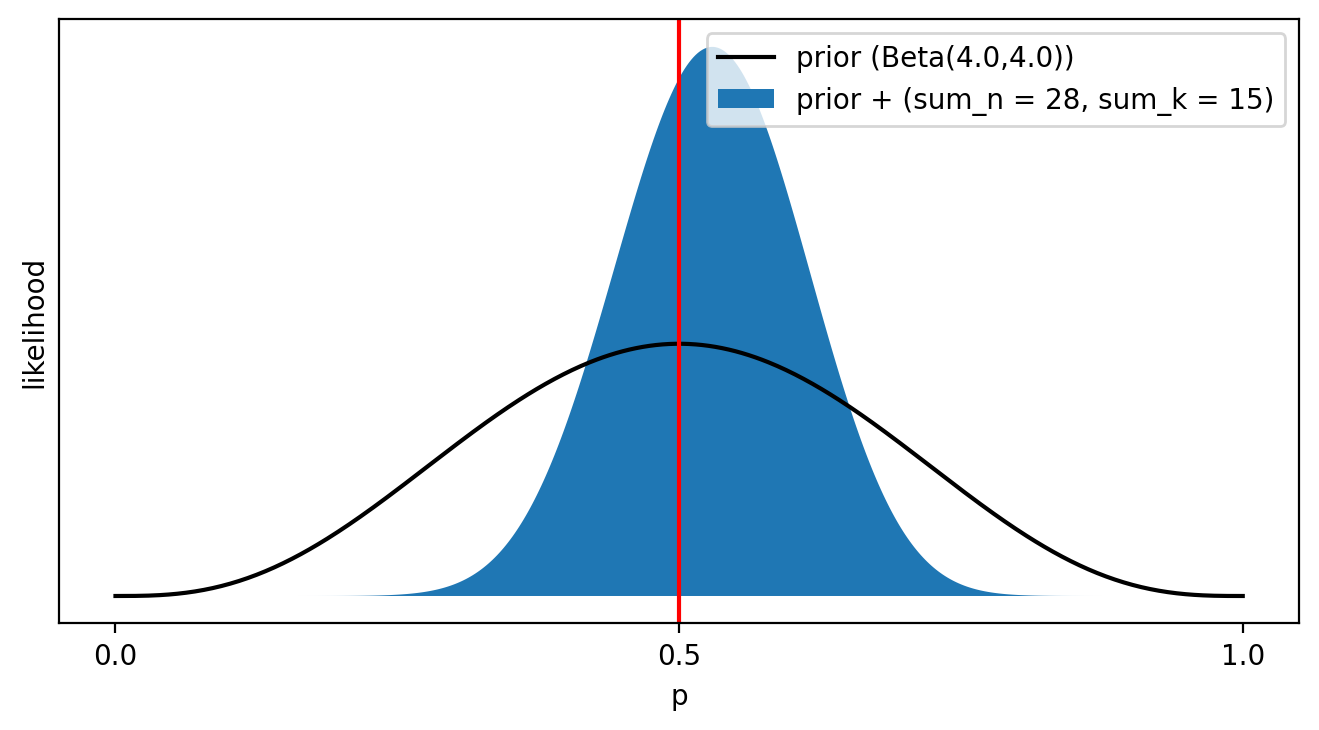

In [22]:
random  = np.random.default_rng(15)

k = 3     # number of Blaze rods needed
c = 5     # number of runs to earn k Blaze rods

sum_k = k * c  # we already know this
sum_n = 0

for experiment in range(c):
    results = random.choice( 2, size=16 )
    while np.sum(results) < k:
        results = np.append( results, random.choice( 2, size=16 ) )
    sum_n += np.sum( np.cumsum( results ) < k ) + 1

my_prior = prior(0.5, 4)
    
fig = plt.figure(figsize=(8, 4), dpi=dpi, facecolor='w', edgecolor='k')

x = np.linspace(0,1,512)
plt.fill_between( x, beta.pdf( x, my_prior[0] + sum_k, my_prior[1] + sum_n - sum_k), linestyle='-',
                label=f'prior + (sum_n = {sum_n}, sum_k = {sum_k})')

plt.plot( x, beta.pdf( x, my_prior[0], my_prior[1]), '-k', \
         label=f'prior (Beta({my_prior[0]:.1f},{my_prior[1]:.1f}))')
plt.axvline( 0.5, color='red' )

plt.xticks([0,.5,1])
plt.xlabel('p')

plt.yticks([])
plt.ylabel('likelihood')

plt.legend()
plt.show()

Figure \ref{fig:posterior_in_action} holds few surprises. Our credence over the Blaze rod drop rate began quite diffuse with the prior. Adding the simulation data grouped our credence more tightly together, making extremely low or high drop rates very unlikely. At the same time, the limited evidence allows drop rates close to $p = 0.5$ to remain very credible, and thanks to the nature of randomness the maximally likely drop rate of the posterior is not the actual value.

## Defining Fairness

Presenting a range of credible values isn't sufficient, as we have a specific hypothesis to test. The words "did Dream cheat?" do not have an obvious mathematical interpretation, but some interpretations are superior to others.

The easiest way to start is not by defining cheating, but instead defining fair play. We know unaltered Minecraft code sets the drop rate to 0.5, so why not define fairness by $\text{Beta}( \alpha_\text{posterior}, \beta_\text{posterior}, 0.5)$?

In [10]:
print( 'The likelihood I was playing fair in my simulation is' +
      f' {beta.pdf( 0.5, my_prior[0] + sum_k, my_prior[1] + sum_n - sum_k)} .')

The likelihood I was playing fair in my simulation is 4.490060385433022 .


The most glaring problem is that the output of the posterior is a likelihood, which isn't normalized like a probability is. We need to find some way to scale or modify that value so that it maps to something more meaningful to us.

But there's a more subtle problem here. Imagine an idealized dart board, centered at the origin of a 2D cartesian plane and with radius 1. Now pick a point on that dart board, and ask yourself the odds of an ideal dart hitting that point. The answer must be zero: since the dart board contains an [uncountably infinite](https://mathworld.wolfram.com/UncountablyInfinite.html) number of points, the odds of a dart hitting any one point is zero. Since the point we chose was arbitrary, we must conclude the odds of an ideal dart hitting our ideal dart board are zero. And yet clearly an ideal dart cast at that board must hit some point.

The solution is not to work with infinitely small points, but instead areas. If we expand the point in question to encompass a finite area, the probability becomes non-zero. Likewise, I could collect Blaze rods in Minecraft until the day I die, and the odds of me getting an exact 50\% drop rate would be incredibly small even if I was playing with an unmodified version of Minecraft. Instead, when assessing fairness we should consider a range of possible drop rates. Where do we place the ends of the range, however?

One possibility comes from coin flipping. That process has been considered fair for a long time, and is often relied on as a source of randomness. One researcher decided to test how fair a coin toss actually is, by asking medical residents to try biasing their coin flips in order to earn a \$20 prize. They were given a few weeks' notice before they were asked to flip a coin 300 times.

> This study shows that when participants are given simple instructions about how to manipulate the toss of a coin and only a few minutes to practise this technique, more than half can significantly manipulate the outcome. With devoted training, more participants would probably be able to achieve this figure, and the magnitude of the manipulation would probably be increased.\cite{ClarkE306}

One way to reconcile these two observations is to essert that a coin toss is "fair enough." Even if it is easy to bias a coin toss, the amount of bias may not be enough to matter in the context of where coin tosses are used. If we take the average bias of coin tosses in this study as our "fair enough" threshold, then fair constitutes no more than an $\frac{569}{500}$ improvement in the odds over perfect fairness, or in this case a success rate of 56.9\%. We could express that in mathematics as

\begin{equation}
\int_{p=0.431}^{0.569} \text{Beta}(\alpha_\text{posterior}, \beta_\text{posterior}, p)
\end{equation}

This definition also has problems, though. Suppose I decided to modify my copy of Minecraft so that Blaze rods dropped 53\% of the time. In the short run this is quite undetectable, but what happens when I do 200 runs where I target seven Blaze rods.

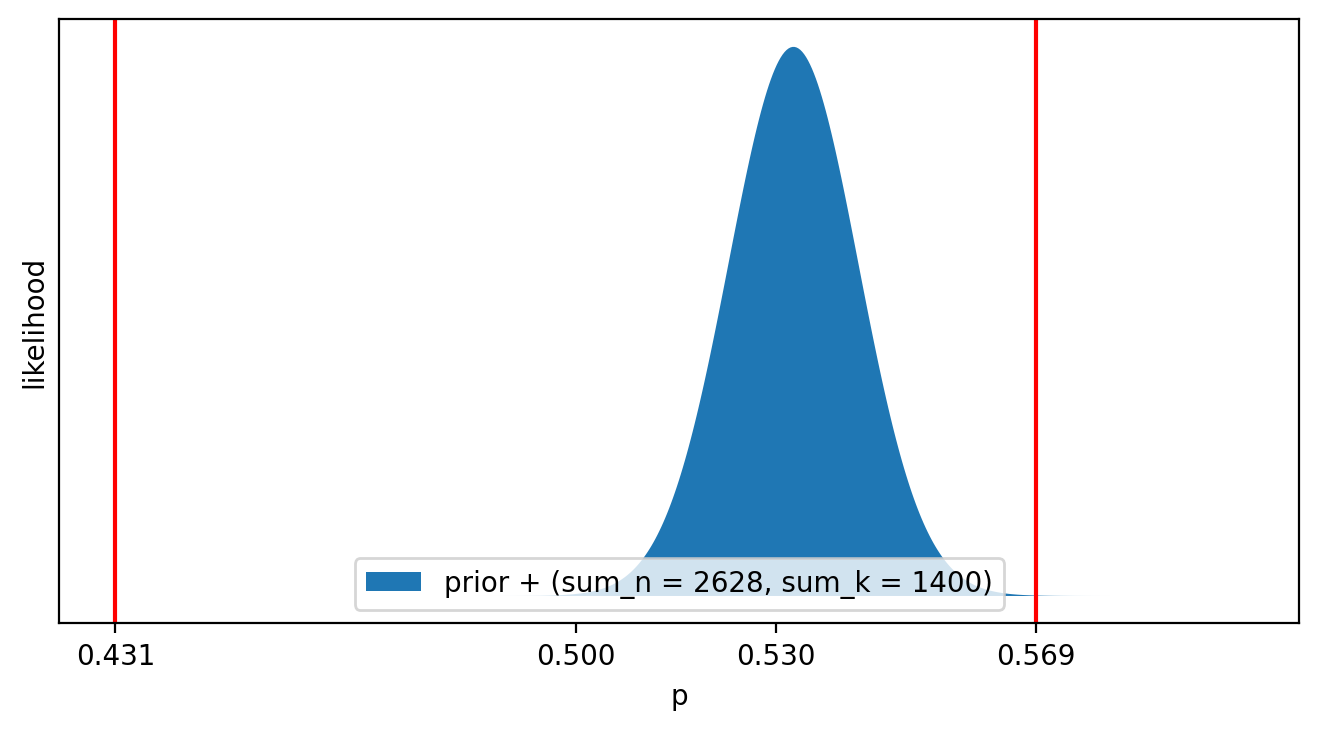

In [23]:
random  = np.random.default_rng(42)

k = 7     # number of Blaze rods needed
c = 200   # number of runs to earn k Blaze rods

sum_k = k * c  # we already know this
sum_n = sum_k + np.sum(random.negative_binomial( k, 0.52, size=c ))

my_prior = prior(0.5, 4)
    
fig = plt.figure(figsize=(8, 4), dpi=dpi, facecolor='w', edgecolor='k')

x = np.linspace(.45,.6,512)
plt.fill_between( x, beta.pdf( x, my_prior[0] + sum_k, my_prior[1] + sum_n - sum_k), linestyle='-',
                label=f'prior + (sum_n = {sum_n}, sum_k = {sum_k})')

plt.axvline( 0.431, color='red' )
plt.axvline( 0.569, color='red' )

plt.xticks([.431, .5,.53,.569])
plt.xlabel('p')

plt.yticks([])
plt.ylabel('likelihood')

plt.legend()
plt.show()

The posterior in Figure \ref{fig:fixed_fairness_bad} appears to provide strong evidence that I altered my drop rate,  as almost none of the credence is massed around $p = \frac 1 2$. Yet almost all of the credence lies within the bounds of integration, so our integral's value would be little different than if the mass had been much more clustered around the halfway mark. $H_\text{fair}$ don't just need to integrate over a range, its must "tighten up" as more data arrives.

Consider a version of Minecraft that swapped out the pseudo-random number generator with a sophisticated deterministic algorithm. This could detect the number of Blaze rods I want over the time period I'm playing, and automatically ensure exactly half of the Blazes I kill will drop Blaze rods. If I fed this fair algorithm into the math and generated a posterior, for the $\|\vec n\|_1 = 28$ case I would get

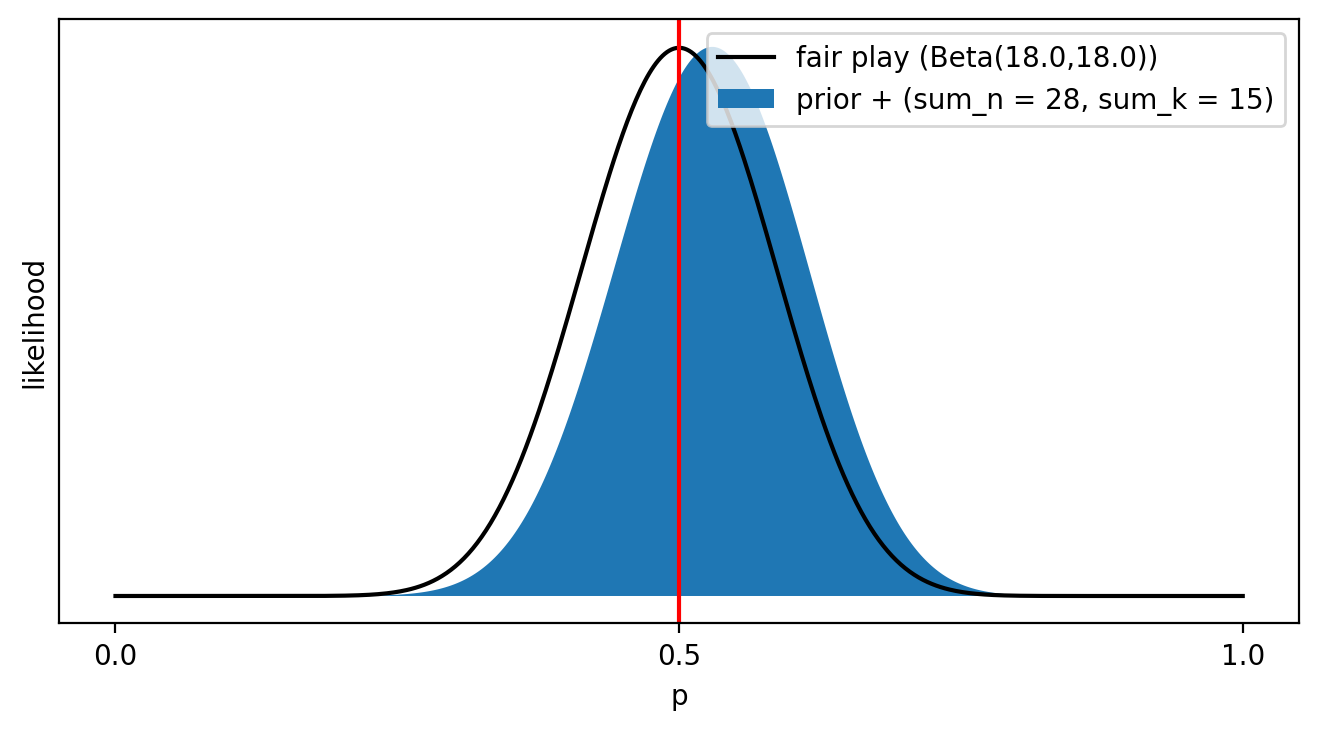

In [24]:
random  = np.random.default_rng(15)

k = 3     # number of Blaze rods needed
c = 5     # number of runs to earn k Blaze rods

sum_k = k * c  # we already know this
sum_n = 0

for experiment in range(c):
    results = random.choice( 2, size=16 )
    while np.sum(results) < k:
        results = np.append( results, random.choice( 2, size=16 ) )
    sum_n += np.sum( np.cumsum( results ) < k ) + 1

my_prior = prior(0.5, 4)
    
fig = plt.figure(figsize=(8, 4), dpi=dpi, facecolor='w', edgecolor='k')

x = np.linspace(0,1,512)
plt.fill_between( x, beta.pdf( x, my_prior[0] + sum_k, my_prior[1] + sum_n - sum_k), linestyle='-',
                label=f'prior + (sum_n = {sum_n}, sum_k = {sum_k})')

plt.plot( x, beta.pdf( x, my_prior[0] + sum_n/2, my_prior[1] + sum_n/2), '-k', \
         label=f'fair play (Beta({my_prior[0] + sum_n/2:.1f},{my_prior[1] + sum_n/2:.1f}))')
plt.axvline( 0.5, color='red' )

plt.xticks([0,.5,1])
plt.xlabel('p')

plt.yticks([])
plt.ylabel('likelihood')

plt.legend()
plt.show()

I consider this a really good match for $H_\text{fair}$, as it nicely satisfies all the above requirements. You might have thought of a problem, though: what if I'd killed 27 Blazes instead of 28? Or, to take a more extreme example, if your copy of Minecraft 1.16.1 is unmodified you'll get 20 Ender pearl barters on 423 attempts. Those two numbers are co-prime, so the number of successful pearl barters will only be an integer so long as the number of attempts is a multiple of 423. It would be terribly inconvenient if we had to wait for 423 barters before we could start our analysis.

This is where the Gamma function really shines, as it's defined for fractions. When calculating $H_\text{fair}$ for Ender pearl barters, we're not forced to assign 20 successes for every 423 barters, we can instead assign $\frac{20}{423}$ successes for every barter. $H_\text{fair}$ is defined for arbitrary numbers of barters or drops.

Let's lock the mathematics for $H_\text{fair}$ down.

\begin{equation}
H_\text{fair}( \vec n, p ) = \text{Beta}( \alpha_\text{prior} + r_\text{fair}\|\vec n\|_1, \beta_\text{prior} + (1-r_\text{fair})\|\vec n\|_1, p ), \label{eqn:h_fair}
\end{equation}

where $r_\text{fair}$ is the rate we expect during fair play. For instace, $r_\text{blaze} = \frac 1 2$ and $r_\text{pearl} = \frac{20}{423}$.

If you do not agree with my definition of "fair play" according to Equation \ref{eqn:h_fair}, I'd encourage you to think up your own and express it in a mathematically precise way. In the meantime, I'll multiply $H_\text{fair}(\vec n)$ by the posterior and integrate.

\begin{equation}
\int_{p=0}^1 \text{Beta}(\alpha_\text{posterior}, \beta_\text{posterior}, p ) H_\text{fair}( \vec n, p ) = \int_{p=0}^1 \text{Beta}( \alpha_\text{prior} + \|\vec k\|_1 , \beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1, p ) \cdot \text{Beta}( \alpha_\text{prior} + r_\text{fair}\|\vec n\|_1, \beta_\text{prior} + (1-r_\text{fair})\|\vec n\|_1, p )
\end{equation}

\begin{equation}
{} = \int_{p=0}^1 \frac{\Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|\vec n\|_1)}{\Gamma(\alpha_\text{prior} + \|\vec k\|_1)\Gamma(\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1)} p^{\alpha_\text{prior} + \|\vec k\|_1 - 1} (1-p)^{\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1 - 1} \frac{\Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|\vec n\|_1)}{\Gamma(\alpha_\text{prior} + r_\text{fair}\|\vec n\|_1)\Gamma(\beta_\text{prior} + (1-r_\text{fair})\|\vec n\|_1)} p^{\alpha_\text{prior} + r_\text{fair}\|\vec n\|_1 - 1} (1-p)^{\beta_\text{prior} + (1-r_\text{fair})\|\vec n\|_1 - 1} 
\end{equation}

\begin{equation}
{} = \frac{\Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|\vec n\|_1)^2}{\Gamma(\alpha_\text{prior} + \|\vec k\|_1)\Gamma(\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1)\Gamma(\alpha_\text{prior} + r_\text{fair}\|\vec n\|_1)\Gamma(\beta_\text{prior} + (1-r_\text{fair})\|\vec n\|_1)} \int_{p=0}^1  p^{2 \alpha_\text{prior} + \|\vec k\|_1 + r_\text{fair}\|\vec n\|_1 - 2} (1-p)^{2 \beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1  + (1-r_\text{fair})\|\vec n\|_1 - 2}
\end{equation}

\begin{equation}
\|\vec n\|_1 + (1-r_\text{fair})\|\vec n\|_1 = (2 -r_\text{fair})\|\vec n\|_1
\end{equation}

\begin{equation}
\int_{p=0}^1  p^{2 \alpha_\text{prior} + \|\vec k\|_1 + r_\text{fair}\|\vec n\|_1 - 2} (1-p)^{2 \beta_\text{prior} + - \|\vec k\|_1  + (2-r_\text{fair})\|\vec n\|_1 - 2} = \frac{\Gamma(2 \alpha_\text{prior} + \|\vec k\|_1 + r_\text{fair}\|\vec n\|_1 - 1)\Gamma(2 \beta_\text{prior} - \|\vec k\|_1  + (2-r_\text{fair})\|\vec n\|_1 - 1)}{\Gamma(2 \alpha_\text{prior} + 2 \beta_\text{prior} + 2\|\vec n\|_1 - 2)}
\end{equation}

\begin{equation}
{} = \frac{\Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|\vec n\|_1)^2 \Gamma(2 \alpha_\text{prior} + \|\vec k\|_1 + r_\text{fair}\|\vec n\|_1 - 1)\Gamma(2 \beta_\text{prior} - \|\vec k\|_1  + (2-r_\text{fair})\|\vec n\|_1 - 1) }{\Gamma(\alpha_\text{prior} + \|\vec k\|_1)\Gamma(\beta_\text{prior} + \|\vec n\|_1 - \|\vec k\|_1)\Gamma(\alpha_\text{prior} + r_\text{fair}\|\vec n\|_1)\Gamma(\beta_\text{prior} + (1-r_\text{fair})\|\vec n\|_1)\Gamma(2 \alpha_\text{prior} + 2 \beta_\text{prior} + 2\|\vec n\|_1 - 2)} \label{eqn:posterior_h_fair}
\end{equation}

Equation \ref{eqn:posterior_h_fair} isn't as tidy as we'd hoped, but at least that integral is gone. Evaluating it looks very difficult, but I have an ace up my sleeve. `mpmath` is a Python library that allows you to do calculations with arbitrary precision. This is handy when dealing with very large numbers, because with conventional floating-point math there's a chance you could overflow and have everything break. One function in that library, `mpmath.gammaprod()`, allows you to calculate fractions with arbitrary numbers of Gamma functions in the numerator or denominator. It makes evaluating messes like Equation \ref{eqn:posterior_h_fair} a snap. Let's fix $\|\vec n\|_1 = 28$ and $r_\text{fair} = \frac 1 2$, apply my prior of $\alpha_\text{prior} = \beta_\text{prior} = 4$, and see what we get for all possible values of $\|\vec k\|_1$.

In [15]:
def posterior_H_fair( vec_k, vec_n, r_fair, a_prior, b_prior ):
    """Calculate the likelihood of H_fair, given the posterior distribution defined by vec_n, vec_k, and the prior.
        Relies on mpmath to perform all calculations, which also means you can adjust the precision.
    
    Parameters
    ----------
    vec_k: A total or list containing the successful attempts at this task until it was completed.
    vec_n: A total or list containing the total attempts at this task until it was completed.
    r_fair: A float between 0 and 1 representing the probability of success predicted by H_fair.
    a_prior: A positive or zero float representing the alpha variable of the prior.
    b_prior: A positive or zero float representing the beta variable of the prior.
    
    Returns
    -------
    The likelihood, an mpmath float in the range [0,infinity]."""

    # place some imports here to encourage copy-paste coding
    from mpmath import gammaprod
    from numpy import sum        # vectorized, likely faster than Python's sum
    
    # the downside of encouraging copy-pasting is that this code will face some
    #  dirty/invalid inputs. By going wild with asserts, I'm making it tougher to
    #  use this function inappropriately.
    assert (r_fair > 0) and (r_fair < 1)
    assert (a_prior >= 0) and (b_prior >= 0)
    
    # use duck typing to determine whether these are lists or not
    try:
        len_k = len(vec_k)
        k_is_list = True
    except TypeError:
        len_k = 1
        k_is_list = False

    try:
        len_n = len(vec_n)
        n_is_list = True
    except TypeError:
        len_n = 1
        n_is_list = False
   
    # do additional checks if both are lists
    if k_is_list and n_is_list:
        
        assert len_k == len_n
        for i,n in enumerate(vec_n):
            assert n > 0
            assert (vec_k[i] >= 0) and (vec_k[i] <= n)
                  
    # now calculate sums      
    if k_is_list:
        sum_k = sum(vec_k)
    else:
        sum_k = vec_k
        
    if n_is_list:
        sum_n = sum(vec_n)
    else:
        sum_n = vec_n
        
    # one final round of checks
    assert sum_n > 1
    assert (sum_k >= 0) and (sum_k <= sum_n)

    # calculate the final result
    numerator =   [a_prior + b_prior + sum_n, a_prior + b_prior + sum_n,
                  2*a_prior + sum_k + r_fair*sum_n - 1,
                  2*b_prior - sum_k + (2 - r_fair)*sum_n - 1]
    denominator = [a_prior + sum_k, b_prior + sum_n - sum_k,
                   a_prior + r_fair*sum_n, b_prior + (1 -r_fair)*sum_n,
                  2*(a_prior + b_prior + sum_n - 1)]
    
    return gammaprod(numerator, denominator)

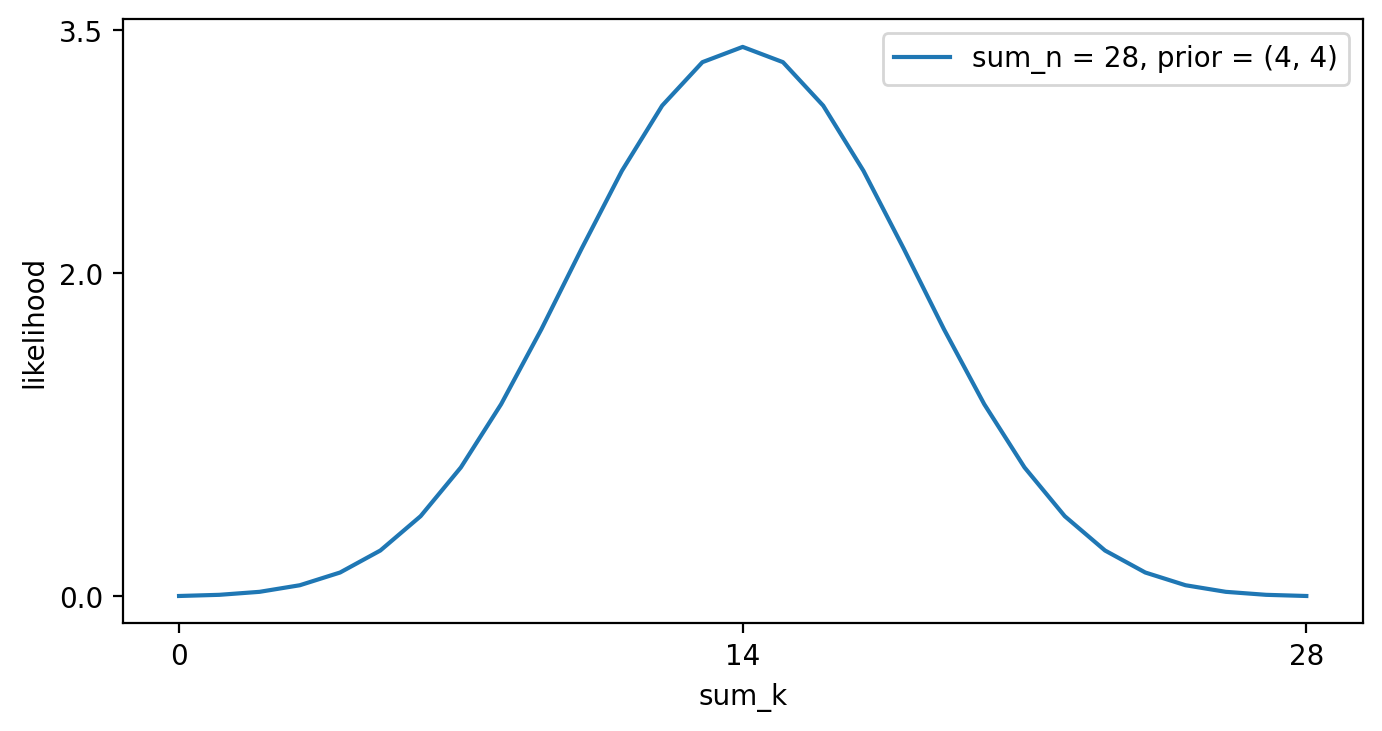

In [20]:
sum_n  = 28
r_fair = Fraction(1,2)
a_prior, b_prior = prior( r_fair, 4 )


fig = plt.figure(figsize=(8, 4), dpi=dpi, facecolor='w', edgecolor='k')

x = np.arange(sum_n + 1)
plt.plot( x, [posterior_H_fair( v, sum_n, r_fair, a_prior, b_prior ) for v in x], '-', \
        label=f'sum_n = {sum_n}, prior = ({a_prior}, {b_prior})')

plt.ylabel("likelihood")
plt.yticks([ 0, 2, 3.5 ])

plt.xlabel('sum_k')
plt.xticks([ 0, 14, 28 ])

plt.legend()
plt.show()

Figure \ref{fig:posterior_H_fair} behaves much as we'd expect. $H_\text{fair}$ is maximized when $\|\vec k\|_1 = r_\text{fair}\|\vec n\|_1$, remains quite high for nearby values, but rapidly drops off as $\|\vec k\|_1$ diverges.

## Defining a Reference Point

Figure \ref{fig:posterior_H_fair} also demonstrates that we're still dealing with raw likelihoods. We still need that reference point.

The usual solution is to calculate a Bayes Factor. You've likely seen Bayes' Theorem,

\begin{equation}
p( H_1 | E ) = \frac{p( E | H_1 ) p( H_1 )}{p(E)}
\end{equation}

The likelihood function $p( E | H_1 )$ and prior $p( H_1 )$ should be familiar enough by now. The normalization factor $p( E )$ is the probability of observing the evidence over all possible hypotheses. We've managed to avoid it by invoking conjugate priors, specifically by starting with a prior that's universal to all hypotheses worthy of consideration. Once we apply a specific hypothesis, or use another method of calculation, $p( E )$ becomes non-trivial to calculate.

The ideal solution is to define a second hypothesis, say $H_2$, and divide.

\begin{equation}
\frac{p( H_1 | E )}{p( H_2 | E )} = \frac{p( E | H_1 ) p( H_1 )}{p( E | H_2 ) p( H_2 )} \label{eqn:bayes_factor}
\end{equation}

This "Bayes Factor" eliminates the need to calculate $p(E)$, and constants across the numerator ond denominator cancel out so computation is easier. It has the same interpretation as betting odds, with numbers greater than 1 indicating $H_1$ is favoured and vice-versa. It also has none of the flaws of p-values. 

In this context, the only worthwhile second hypothesis is "did Dream cheat?". Unfortunately, while there's only one $r_\text{fair}$ there are many ways to cheat. Consider this naive approach:

\begin{align}
H_\text{cheat} &= \frac{ M - \text{Beta}( \alpha_\text{prior} + r_\text{fair}\|\vec n\|_1, \beta_\text{prior} + (1-r_\text{fair})\|\vec n\|_1, p) }{M - 1} \\
M &= \text{Beta}( \alpha_\text{prior} + r_\text{fair}\|\vec n\|_1, \beta_\text{prior} + (1-r_\text{fair})\|\vec n\|_1, m) \\
m &= \frac{\alpha_\text{prior} + r_\text{fair}\|\vec n\|_1 - 1}{\alpha_\text{prior} + \beta_\text{prior} + \|\vec n\|_1 - 2}
\end{align}

For the toy example above, this hypothesis looks like

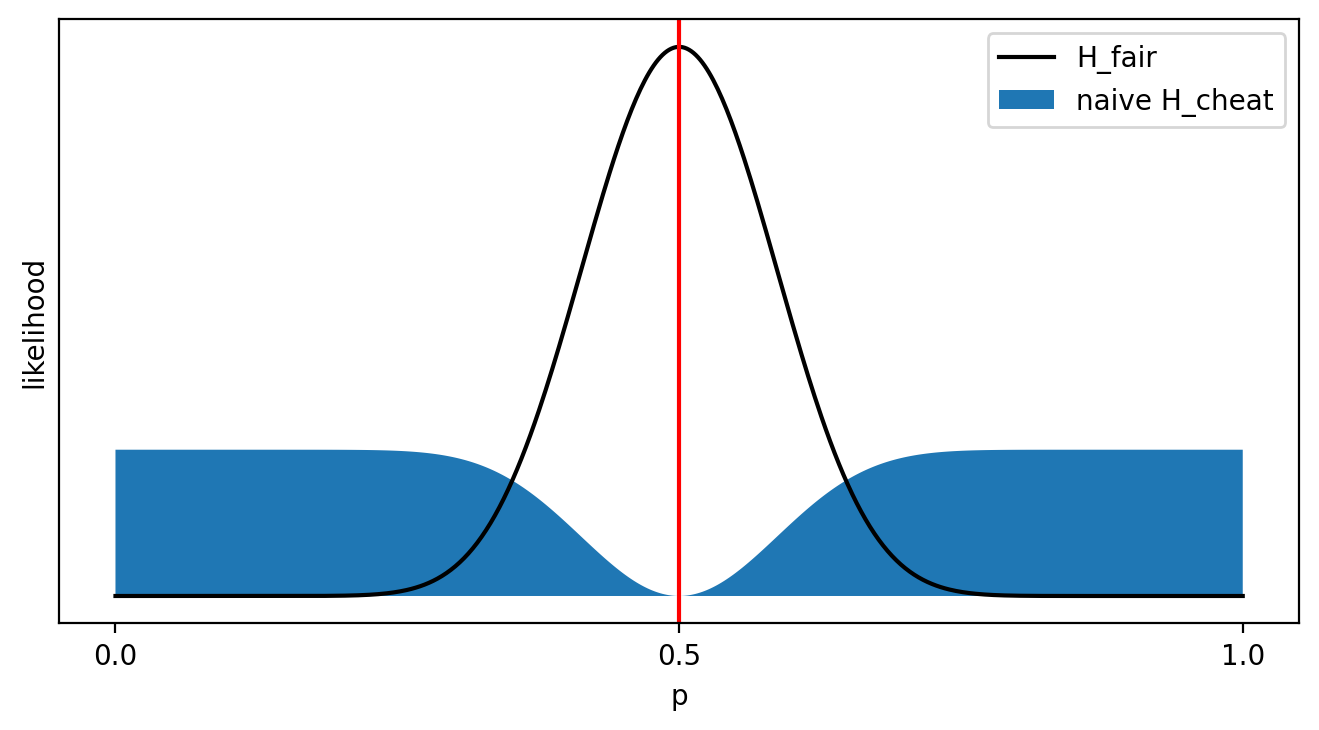

In [28]:
random  = np.random.default_rng(15)

k = 3     # number of Blaze rods needed
c = 5     # number of runs to earn k Blaze rods

sum_k = k * c  # we already know this
sum_n = 0

for experiment in range(c):
    results = random.choice( 2, size=16 )
    while np.sum(results) < k:
        results = np.append( results, random.choice( 2, size=16 ) )
    sum_n += np.sum( np.cumsum( results ) < k ) + 1

my_prior = prior(0.5, 4)

    
fig = plt.figure(figsize=(8, 4), dpi=dpi, facecolor='w', edgecolor='k')

x = np.linspace(0,1,512)
m = (my_prior[0] + sum_n/2 - 1) / (sum(my_prior) + sum_n - 2)
M = beta.pdf( m, my_prior[0] + sum_n/2, my_prior[1] + sum_n/2)
plt.fill_between( x, (M - beta.pdf( x, my_prior[0] + sum_n/2, my_prior[1] + sum_n/2))/(M-1), \
         label='naive H_cheat')

plt.plot( x, beta.pdf( x, my_prior[0] + sum_n/2, my_prior[1] + sum_n/2), '-k', label='H_fair')
plt.axvline( 0.5, color='red' )


plt.xticks([0,.5,1])
plt.xlabel('p')

plt.yticks([])
plt.ylabel('likelihood')

plt.legend()
plt.show()

$$ Pr( H_\text{fair} | k, n ) = \frac{ \int_{p=0}^1 \text{Beta}( \alpha_\text{prior} + \|k\|_1 , \beta_\text{prior} + \|n\|_1 - \|k\|_1, p ) \cdot \text{Beta}( \alpha_\text{prior} + r_\text{fair}\|n\|_1, \beta_\text{prior} + (1-r_\text{fair})\|n\|_1, p ) }{ \int_{p=0}^1 \text{Beta}( \alpha_\text{prior} + r_\text{fair}\|n\|_1, \beta_\text{prior} + (1-r_\text{fair})\|n\|_1, p )^2 } $$

$$ \text{Beta}( \alpha_\text{prior} + \|k\|_1 , \beta_\text{prior} + \|n\|_1 - \|k\|_1, p ) \cdot \text{Beta}( \alpha_\text{prior} + r_\text{fair}\|n\|_1, \beta_\text{prior} + (1-r_\text{fair})\|n\|_1, p ) = \frac{ \Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|n\|_1) }{\Gamma(\alpha_\text{prior} + \|k\|_1)\Gamma(\beta_\text{prior} + \|n\|_1 - \|k\|_1)} p^{\alpha_\text{prior} + \|k\|_1 - 1} (1-p)^{\beta_\text{prior} + \|n\|_1 - \|k\|_1 - 1 } \cdot \frac{ \Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|n\|_1) }{\Gamma(\alpha_\text{prior} + r\|n\|_1)\Gamma(\beta_\text{prior} + (1-r)\|n\|_1)} p^{\alpha_\text{prior} + r\|n\|_1 - 1} (1-p)^{\beta_\text{prior} + (1-r)\|n\|_1 - 1 } $$

$$ \text{Beta}( \alpha_\text{prior} + r_\text{fair}\|n\|_1, \beta_\text{prior} + (1-r_\text{fair})\|n\|_1, p )^2 = \frac{ \Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|n\|_1) }{\Gamma(\alpha_\text{prior} + r\|n\|_1)\Gamma(\beta_\text{prior} + (1-r)\|n\|_1)} p^{\alpha_\text{prior} + r\|n\|_1 - 1} (1-p)^{\beta_\text{prior} + (1-r)\|n\|_1 - 1 } \frac{ \Gamma(\alpha_\text{prior} + \beta_\text{prior} + \|n\|_1) }{\Gamma(\alpha_\text{prior} + r\|n\|_1)\Gamma(\beta_\text{prior} + (1-r)\|n\|_1)} p^{\alpha_\text{prior} + r\|n\|_1 - 1} (1-p)^{\beta_\text{prior} + (1-r)\|n\|_1 - 1 } $$

$$ \frac{ 1 }{\Gamma(\alpha_\text{prior} + \|k\|_1)\Gamma(\beta_\text{prior} + \|n\|_1 - \|k\|_1)} \int_{p=0}^1 p^{\alpha_\text{prior} + \|k\|_1 - 1 + \alpha_\text{prior} + r\|n\|_1 - 1} (1-p)^{\beta_\text{prior} + \|n\|_1 - \|k\|_1 - 1 + \beta_\text{prior} + (1-r)\|n\|_1 - 1 } $$

$$ \frac{ 1 }{\Gamma(\alpha_\text{prior} + \|k\|_1)\Gamma(\beta_\text{prior} + \|n\|_1 - \|k\|_1)} \int_{p=0}^1 p^{2 \alpha_\text{prior} + \|k\|_1 + r\|n\|_1 - 2} (1-p)^{2\beta_\text{prior} + (2-r)\|n\|_1 - \|k\|_1 - 2 } $$

$$ \frac{ 1 }{\Gamma(\alpha_\text{prior} + \|k\|_1)\Gamma(\beta_\text{prior} + \|n\|_1 - \|k\|_1)} \frac{\Gamma(2 \alpha_\text{prior} + \|k\|_1 + r\|n\|_1 - 1)\Gamma(2\beta_\text{prior} + (2-r)\|n\|_1 - \|k\|_1 - 1)}{\Gamma(2 \alpha_\text{prior} + \|k\|_1 + r\|n\|_1 - 1 + 2\beta_\text{prior} + (2-r)\|n\|_1 - \|k\|_1 - 1)} $$

$$ \frac{ 1 }{\Gamma(\alpha_\text{prior} + \|k\|_1)\Gamma(\beta_\text{prior} + \|n\|_1 - \|k\|_1)} \frac{\Gamma(2 \alpha_\text{prior} + \|k\|_1 + r\|n\|_1 - 1)\Gamma(2\beta_\text{prior} + (2-r)\|n\|_1 - \|k\|_1 - 1)}{\Gamma\left(2( \alpha_\text{prior} + \beta_\text{prior} + \|n\|_1 - 1)\right)} $$

$$ \frac{ 1 }{\Gamma(\alpha_\text{prior} + r\|n\|_1)\Gamma(\beta_\text{prior} + (1-r)\|n\|_1)} \int_{p=0}^1 p^{\alpha_\text{prior} + r\|n\|_1 - 1 + \alpha_\text{prior} + r\|n\|_1 - 1} (1-p)^{\beta_\text{prior} + (1-r)\|n\|_1 - 1  + \beta_\text{prior} + (1-r)\|n\|_1 - 1} $$

$$ \frac{ 1 }{\Gamma(\alpha_\text{prior} + r\|n\|_1)\Gamma(\beta_\text{prior} + (1-r)\|n\|_1)} \int_{p=0}^1 p^{2\alpha_\text{prior} + 2r\|n\|_1 - 2} (1-p)^{2\beta_\text{prior} + 2(1-r)\|n\|_1 - 2} $$

$$ \frac{ 1 }{\Gamma(\alpha_\text{prior} + r\|n\|_1)\Gamma(\beta_\text{prior} + (1-r)\|n\|_1)} \frac{\Gamma(2\alpha_\text{prior} + 2r\|n\|_1 - 1)\Gamma(2\beta_\text{prior} + 2(1-r)\|n\|_1 - 1)}{\Gamma(2\alpha_\text{prior} + 2r\|n\|_1 - 1 + 2\beta_\text{prior} + 2(1-r)\|n\|_1 - 1)} $$

$$ \frac{ 1 }{\Gamma(\alpha_\text{prior} + r\|n\|_1)\Gamma(\beta_\text{prior} + (1-r)\|n\|_1)} \frac{\Gamma(2\alpha_\text{prior} + 2r\|n\|_1 - 1)\Gamma(2\beta_\text{prior} + 2(1-r)\|n\|_1 - 1)}{\Gamma\left(2(\alpha_\text{prior} + \beta_\text{prior} + \|n\|_1 - 1)\right)} $$

$$ Pr( H_\text{fair} | k, n ) = \frac{\Gamma(\alpha_\text{prior} + r\|n\|_1)\Gamma(\beta_\text{prior} + (1-r)\|n\|_1) }{\Gamma(\alpha_\text{prior} + \|k\|_1)\Gamma(\beta_\text{prior} + \|n\|_1 - \|k\|_1) } \frac{\Gamma(2 \alpha_\text{prior} + \|k\|_1 + r\|n\|_1 - 1)\Gamma(2\beta_\text{prior} + (2-r)\|n\|_1 - \|k\|_1 - 1)}{\Gamma(2\alpha_\text{prior} + 2r\|n\|_1 - 1)\Gamma(2\beta_\text{prior} + 2(1-r)\|n\|_1 - 1)}$$

In [38]:
def prob_H_fair( vec_k, vec_n, r_fair, a_prior, b_prior ):
    """Calculate the probability of someone playing fairly, according to H_fair.
        Relies on mpmath to perform all calculations, which also means you can adjust the precision.
    
    Parameters
    ----------
    vec_k: A total or list containing the successful attempts at this task until it was completed.
    vec_n: A total or list containing the total attempts at this task until it was completed.
    r_fair: A float between 0 and 1 representing the probability of success predicted by H_fair.
    a_prior: A positive or zero float representing the alpha component of the prior.
    b_prior: A positive or zero float representing the beta component of the prior.
    
    Returns
    -------
    The probability, an mpmath float in the range [0,1]."""

    # place some imports here to encourage copy-paste coding
    from mpmath import gammaprod
    from numpy import sum        # vectorized, likely faster than Python's sum
    
    # the downside of encouraging copy-pasting is that this code will face some
    #  dirty/invalid inputs. By going wild with asserts, I'm making it tougher to
    #  use this function inappropriately.
    assert (r_fair > 0) and (r_fair < 1)
    assert (a_prior >= 0) and (b_prior >= 0)
    
    # use duck typing to determine whether these are lists or not
    try:
        len_k = len(vec_k)
        k_is_list = True
    except TypeError:
        len_k = 1
        k_is_list = False

    try:
        len_n = len(vec_n)
        n_is_list = True
    except TypeError:
        len_n = 1
        n_is_list = False
   
    # do additional checks if both are lists
    if k_is_list and n_is_list:
        
        assert len_k == len_n
        for i,n in enumerate(vec_n):
            assert n > 0
            assert (vec_k[i] >= 0) and (vec_k[i] <= n)
                  
    # now calculate sums      
    if k_is_list:
        sum_k = sum(vec_k)
    else:
        sum_k = vec_k
        
    if n_is_list:
        sum_n = sum(vec_n)
    else:
        sum_n = vec_n
        
    # one final round of checks
    assert sum_n > 1
    assert (sum_k >= 0) and (sum_k <= sum_n)

    # calculate the final result
    numerator =   [a_prior + r_fair*sum_n, b_prior + (1-r_fair)*sum_n,
                   2*a_prior + sum_k + r_fair*sum_n - 1,
                   2*b_prior + (2 - r_fair)*sum_n - sum_k - 1]
    denominator = [a_prior + sum_k, b_prior + sum_n - sum_k,
                   2*a_prior + 2*r_fair*sum_n - 1,
                   2*b_prior + 2*(1 - r_fair)*sum_n - 1]
    
    return gammaprod(numerator, denominator)

In [50]:
random.negative_binomial( 7, .5 )

5

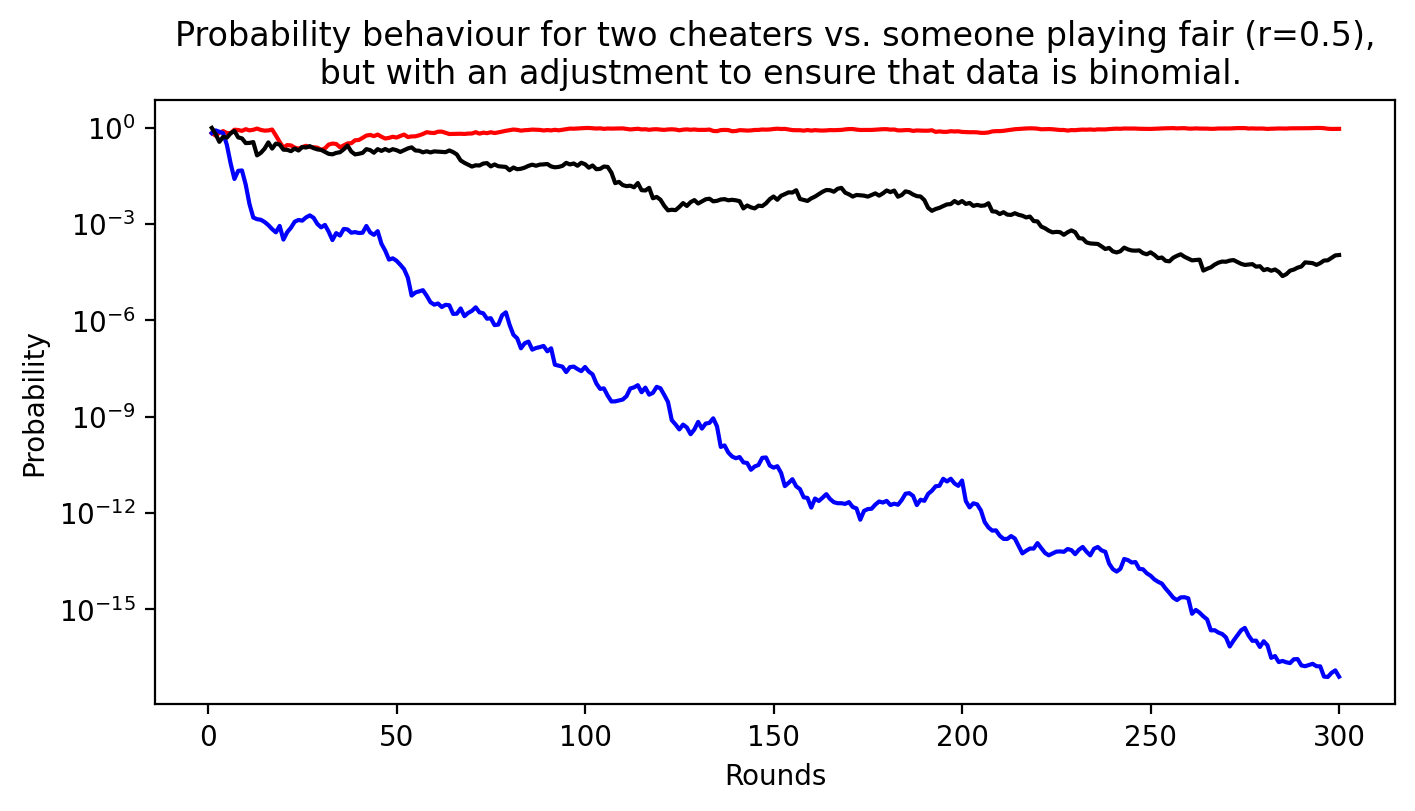

In [52]:
mean      = 6
stdev     = 1
r_fair    = 0.5
r_cheat_h = 0.55
r_cheat_l = 0.45
count     = 300
a_prior   = 4
b_prior   = 4

x         = np.arange(1, count+1)
k         = np.array(np.maximum( random.standard_normal(count)*stdev + mean + .5, 1 ),dtype='int64')
cheat_h_nk = random.negative_binomial( k, r_cheat_h )
cheat_l_nk = random.negative_binomial( k, r_cheat_l ) 
fair_nk    = random.negative_binomial( k, r_fair )

cheat_h_y = [float(prob_H_fair(k[:i], k[:i] + cheat_h_nk[:i], r_fair, a_prior, b_prior, negbinom=True)) for i in x]
cheat_l_y = [float(prob_H_fair(k[:i], k[:i] + cheat_l_nk[:i], r_fair, a_prior, b_prior, negbinom=True)) for i in x]
fair_y  = [float(prob_H_fair(k[:i], k[:i] + fair_nk[:i], r_fair, a_prior, b_prior, negbinom=True)) for i in x]


fig = plt.figure(figsize=(8, 4), dpi=dpi, facecolor='w', edgecolor='k')

plt.plot( x, cheat_h_y, '-r', label=f'cheater (r={r_cheat_h})' )
plt.plot( x, cheat_l_y, '-b', label=f'cheater (r={r_cheat_l})' )
plt.plot( x, fair_y, '-k', label='fair' )

plt.title( f"Probability behaviour for two cheaters vs. someone playing fair (r={r_fair})," + \
                  "\n but with an adjustment to ensure that data is binomial." )
plt.xlabel("Rounds")
plt.ylabel('Probability')
plt.yscale("log")

plt.show()

In [ ]:
mean    = 15
stdev   = 9.35
r_cheat = 30/423
r_fair  = 20/423
a_prior = 4
b_prior = 2 / r_fair
count   = 150

n       = np.array(np.maximum( random.standard_normal(count)*stdev + mean + .5, 2 ),dtype='int64')
cheat_k = random.binomial( n-1, r_cheat ) + 1 
fair_k  = random.binomial( n-1, r_fair ) + 1

x           = np.arange(1, count+1)
sum_n       = np.cumsum( n ) - x
sum_cheat_k = np.cumsum( cheat_k ) - x
sum_fair_k  = np.cumsum( fair_k ) - x

cheat_y = [float(prob_H_fair(sum_cheat_k[i], n, r_fair, a_prior, b_prior)) for i,n in enumerate(sum_n)]
fair_y  = [float(prob_H_fair(sum_fair_k[i], n, r_fair, a_prior, b_prior)) for i,n in enumerate(sum_n)]


fig = go.Figure()
fig.add_trace( go.Scatter(x=x, y=cheat_y, name='cheater', mode='lines') )
fig.add_trace( go.Scatter(x=x, y=fair_y, name='fair', mode='lines') )

fig.update_layout(title=f"Probability behaviour for a cheater (r={r_cheat}) vs. someone playing fair (r={r_fair})," + \
                  "<br> but with an adjustment to ensure that data is binomial.")
fig.update_xaxes(title="Rounds")
fig.update_yaxes(title='Probability',type="log")

fig_show()

In [ ]:
players = ['benex','dream','illumina','sizzler','vadikus007']

bartering  = dict()
blaze_rods = dict()

for p in players:
    bartering[p]  = pd.read_csv(f'data/bartering.{p}.tsv',sep="\t")
    blaze_rods[p] = pd.read_csv(f'data/blaze.{p}.tsv',sep="\t")

bartering['dream'].tail()

In [ ]:
fig = go.Figure()
r_fair = 0.5
a_prior = 4
b_prior = 2 / r_fair

for p in players:
    
    count = len(blaze_rods[p])
    x     = np.arange(1, count+1)
    sum_n = np.cumsum( blaze_rods[p]['n'] ) - x
    sum_k = np.cumsum( blaze_rods[p]['k'] ) - x

    y = [float(prob_H_fair(sum_k[i], n, r_fair, a_prior, b_prior)) for i,n in enumerate(sum_n)]
    fig.add_trace( go.Scatter(x=x, y=y, name=p, mode='lines') )

fig.update_layout(title=f"Probabilities for Blaze rod drops (r={r_fair})," + \
                    "<br> but with an adjustment to ensure that the data is binomial.")

fig.update_xaxes(title="Rounds")
fig.update_yaxes(title='Probability',type="log")

fig_show()

In [ ]:
fig = go.Figure()
r_fair = 20/423
a_prior = 4
b_prior = 2 / r_fair

for p in players:
    
    count = len(bartering[p])
    x     = np.arange(1, count+1)
    sum_n = np.cumsum( bartering[p]['n'] ) - x
    sum_k = np.cumsum( bartering[p]['k'] ) - x

    y = [float(prob_H_fair(sum_k[i], n, r_fair, a_prior, b_prior)) for i,n in enumerate(sum_n)]
    fig.add_trace( go.Scatter(x=x, y=y, name=p, mode='lines') )

fig.update_layout(title=f"Probabilities for Piglin bartering drops (r={r_fair})," + \
                    "<br> but with an adjustment to ensure that data is binomial.")

fig.update_xaxes(title="Rounds")
fig.update_yaxes(title='Probability',type="log")

fig_show()